In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS 
from sklearn.model_selection import GridSearchCV
from datetime import datetime, timedelta

# Data Exploration

In [2]:
data = pd.read_csv('data/djia.csv')

In [3]:
data.head(5)

Date          Open          High           Low         Close  \
0  2016-12-30  19833.169922  19852.550781  19718.669922  19762.599609   
1  2016-12-29  19835.460938  19878.439453  19788.939453  19819.779297   
2  2016-12-28  19964.310547  19981.109375  19827.310547  19833.679688   
3  2016-12-27  19943.460938  19980.240234  19939.800781  19945.039062   
4  2016-12-23  19908.609375  19934.150391  19899.060547  19933.810547   

      Volume     Adj Close  
0  271910000  19762.599609  
1  172040000  19819.779297  
2  188350000  19833.679688  
3  158540000  19945.039062  
4  158260000  19933.810547

In [4]:
data.index = data['Date']

In [5]:
data = data.drop(['Date'],axis=1)

In [6]:
data.head()

Open          High           Low         Close     Volume  \
Date                                                                            
2016-12-30  19833.169922  19852.550781  19718.669922  19762.599609  271910000   
2016-12-29  19835.460938  19878.439453  19788.939453  19819.779297  172040000   
2016-12-28  19964.310547  19981.109375  19827.310547  19833.679688  188350000   
2016-12-27  19943.460938  19980.240234  19939.800781  19945.039062  158540000   
2016-12-23  19908.609375  19934.150391  19899.060547  19933.810547  158260000   

               Adj Close  
Date                      
2016-12-30  19762.599609  
2016-12-29  19819.779297  
2016-12-28  19833.679688  
2016-12-27  19945.039062  
2016-12-23  19933.810547

In [7]:
data['30ma'] = data['Adj Close'].rolling(window=30,min_periods=0).mean()

In [8]:
data2 = data.copy()
data2.index = [pd.to_datetime(date) for date in data2.index]

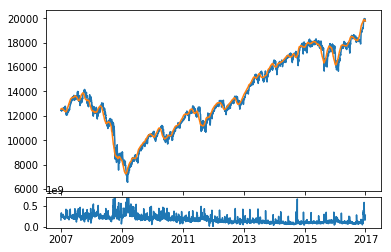

In [9]:
axis1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
axis2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex = axis1)
axis1.plot(data2.index,data['Adj Close'])
axis1.plot(data2.index,data['30ma'])
axis2.plot(data2.index,data['Volume'])

In [10]:
data2 = data.copy()
l = []
for date in data2.index:
    l.append(date[0:4])
data2.index = l

In [11]:
# Find the max Close price in every year
data2.groupby(data2.index)['Close'].max()

2006    12463.150391
2007    14164.530273
2008    13058.200195
2009    10548.509766
2010    11585.379883
2011    12810.540039
2012    13610.150391
2013    16576.660156
2014    18053.710938
2015    18312.390625
2016    19974.619141
Name: Close, dtype: float64

In [8]:
df = pd.read_pickle('data/news_data.pkl')

In [9]:
df.head(5)

close     adj close  \
2007-01-01  12469.971875  12469.971875   
2007-01-02  12472.245703  12472.245703   
2007-01-03  12474.519531  12474.519531   
2007-01-04  12480.690430  12480.690430   
2007-01-05  12398.009766  12398.009766   

                                                     articles  
2007-01-01  stick 06 somalia order islamists turn weapons ...  
2007-01-02   heart health  vitamin prevent death heart dis...  
2007-01-03   google answer fill job algorithm  germany  da...  
2007-01-04   help make shift combat commerce  addenda  ind...  
2007-01-05   rise ethanol raise concern corn food  new maj...

In [10]:
df['price'] = df['adj close'].apply(np.int64)

In [11]:
df = df[['price','articles']]

In [12]:
df['articles'] = df['articles'].map(lambda x: x.lstrip('.-'))

In [13]:
df.head(6)

price                                           articles
2007-01-01  12469  stick 06 somalia order islamists turn weapons ...
2007-01-02  12472   heart health  vitamin prevent death heart dis...
2007-01-03  12474   google answer fill job algorithm  germany  da...
2007-01-04  12480   help make shift combat commerce  addenda  ind...
2007-01-05  12398   rise ethanol raise concern corn food  new maj...
2007-01-06  12406   status quo secretary general  best buy circui...

In [18]:
df2 = df.copy()
l = []
for date in df2.index:
    l.append(date.year)
df2.index = l

In [19]:
df2.head()

price                                           articles
2007  12469  stick 06 somalia order islamists turn weapons ...
2007  12472   heart health  vitamin prevent death heart dis...
2007  12474   google answer fill job algorithm  germany  da...
2007  12480   help make shift combat commerce  addenda  ind...
2007  12398   rise ethanol raise concern corn food  new maj...

In [20]:
# Find the max Close price in every year
df2.groupby(df2.index)['price'].max()

2007    14164
2008    13154
2009    10548
2010    11585
2011    12810
2012    13610
2013    16576
2014    18053
2015    18312
2016    19974
Name: price, dtype: int64

In [21]:
# Finding the article words which lead to highest price in the year
ls = df2.groupby(df2.index)['price'].max()
ls.loc[2016]
for year in ls.index:    
    print(df2[df2['price']== ls.loc[year]]['articles'])    

2007     baboons think  yes  think   mail workers resu...
Name: articles, dtype: object
2008     children  study tie little sleep much weight ...
Name: articles, dtype: object
2009     death toll climb attack pakistani shiites  ch...
Name: articles, dtype: object
2010     turkey  thanksgiving  iran execute 2 men  say...
Name: articles, dtype: object
2011     south assess toll deadly barrage tornadoes  j...
Name: articles, dtype: object
2012     turkey  parliament back military measure syri...
Name: articles, dtype: object
2013     human brain  size really  everything  bomb at...
Name: articles, dtype: object
2014     israel  jewish republic   religious intoleran...
2015     scientists demonstrate animal mindmelds  prem...
2016     syria ceasefire crumble bomb kill dozens  lon...
Name: articles, dtype: object
2015     fruit fly show enter fearlike state  first  f...
Name: articles, dtype: object
2016     trump infrastructure plan work   volkswagen e...
Name: articles, dtype: object


In [22]:
art_list = df2.groupby(df2.index)['articles'].apply(lambda x: "{%s}" % ' '.join(x))

Year = 2007


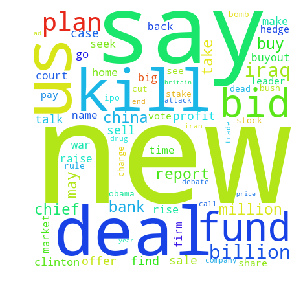

Year = 2008


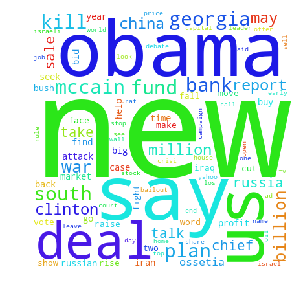

Year = 2009


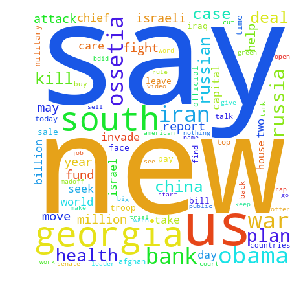

Year = 2010


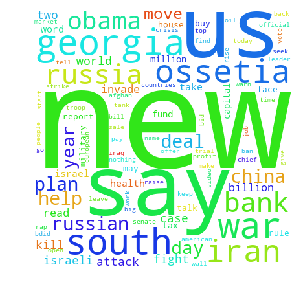

Year = 2011


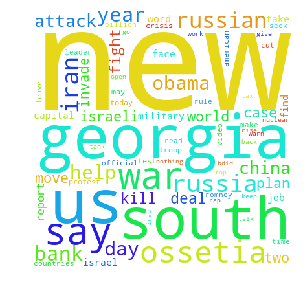

Year = 2012


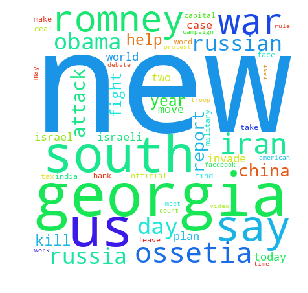

Year = 2013


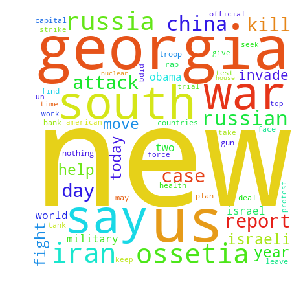

Year = 2014


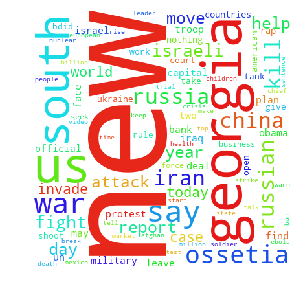

Year = 2015


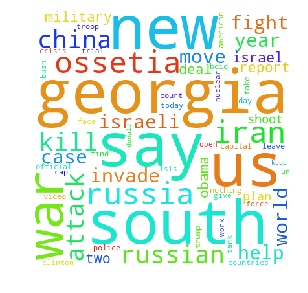

Year = 2016


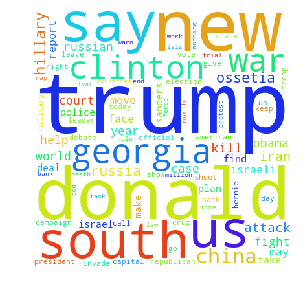

In [23]:
# What news(word) was trending over the years??
stopwords = set(STOPWORDS)
for i in art_list.index:
    wordcloud = WordCloud(width = 400, height = 400, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(art_list.loc[i]) 

    # plot the WordCloud image                        
    plt.figure(figsize = (4, 4), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    print('Year = {}'.format(i))
    plt.show()

In [24]:
# Lots of news regarding 'NEW' stuff probably influence the stock market a lot!!

# Data Manipulation

### SMA (Simple Moving Average)

In [ ]:
A simple moving average is calculated by finding the average price of the stock price over a specific number of periods.
For example a 5-day moving average would calaculate the average of last 5 days as the SMA of current day. The problem
with this implemenatation is that even if it smoothens the plot, it introduces a lag since the previous day prices are 
less than the current price.

### EMA (Exponential Moving Average)

In [ ]:
One way to get over the problem of lag is by using EMA. It is the weighted average of last n day prices where the 
weighting decreases exponentially with each previous price/period. 
It basically means that it gives higher weight to recent prices and the degree of contribution decays exponentially
as prices go further past..

In [ ]:
Image(filename='img/ema.png', width="400")

### MACD ( Moving Average Convergence Divergence )

In [ ]:
The moving average convergence divergence (MACD) is a technical momentum indicator, calculated for use with a 
variety of exponential moving averages (EMAs). It is used to know the trend in the stock market.

Steps:
1) Calculate a 12-period EMA of price for the chosen time period.
2) Calculate a 26-period EMA of price for the chosen time period.
3) Subtract the 26-period EMA from the 12-period EMA.
4) Calculate a nine-period EMA of the result obtained from step 3.

We have used this feature in this notebook.

We have used MACD(12,26,9)
The MACD Line is the 12-day Exponential Moving Average (EMA) less the 26-day EMA. 
Closing prices are used for these moving averages. 
A 9-day EMA of the MACD Line is plotted with the indicator to act as a signal line and identify turns.

The MACD Histogram represents the difference between MACD and its 9-day EMA, the signal line.

The histogram is positive when the MACD Line is above its Signal line and negative when the MACD Line is 
below its Signal line.

### Stochastic Oscillator

In [ ]:
The stochastic oscillator is a momentum indicator comparing the closing price of a security to the range of its 
prices over a certain period of time.

The stochastic oscillator is calculated using the following formula:

%K = 100(Current Close - Lowest Low)/(Highest High - Lowest Low)
%D = 3-period moving average of %K

Where:

Current Close = the most recent closing price

Lowest Low = the lowest low for the previous period

Highest High = the highest high for the previous period

%K = the current market rate for the stock price


The general theory serving as the foundation for this indicator is that in a market trending upward, prices will close 
near the high, and in a market trending downward, prices close near the low. Transaction signals are created when 
the %K crosses through a three-period moving average, which is called the %D.

In [ ]:
Image(filename='img/stochastic.png',width="300")

In [14]:
def MACD(df,period1,period2,periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean()    # By giving a span value, we specify the alpha = 2/(span + 1)
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean()
    MACD = EMA1-EMA2
    
    signal = pd.DataFrame.ewm(MACD,periodSignal).mean()    
    
    histogram = MACD-signal
    
    return histogram

def stochastics_oscillator(df,period):
    # Finding the lowest low and highest high
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max() 
    
    k = 100 * (df - l) / (h - l)
    return k


In [15]:
df['macd'] = MACD(df['price'],12,26,9)
df['stochastics'] = stochastics_oscillator(df['price'],14)

In [16]:
df.dropna(inplace=True)

In [17]:
df.head(5)

price                                           articles  \
2007-01-14  12569   smoke damage  mr spitzer  task court reform  ...   
2007-01-15  12575   mentally ill  behind bar  bp  chief join apax...   
2007-01-16  12582   king day atlanta   one without mrs king   isr...   
2007-01-17  12577   racial hate feed gang war  senseless kill  is...   
2007-01-18  12567   taliban detainee say rebel chief hide pakista...   

                 macd  stochastics  
2007-01-14  12.762211   100.000000  
2007-01-15  13.711670   100.000000  
2007-01-16  14.146180   100.000000  
2007-01-17  13.569798    97.282609  
2007-01-18  12.039695    91.847826

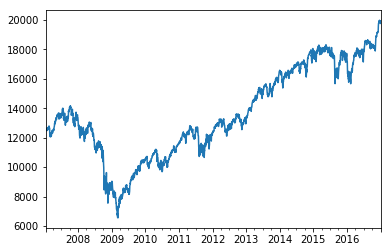

In [18]:
df['price'].plot()  # General idea of stock price change over the years..

In [19]:
df_main = df[['price','macd','stochastics']].copy()

In [20]:
df_main.head(5)

price       macd  stochastics
2007-01-14  12569  12.762211   100.000000
2007-01-15  12575  13.711670   100.000000
2007-01-16  12582  14.146180   100.000000
2007-01-17  12577  13.569798    97.282609
2007-01-18  12567  12.039695    91.847826

In [21]:
df_main['total'] = ''
df_main['positive'] = ''
df_main['neutral'] = ''
df_main['negative'] = ''

In [22]:
df_main.head(5)

price       macd  stochastics total positive neutral negative
2007-01-14  12569  12.762211   100.000000                                
2007-01-15  12575  13.711670   100.000000                                
2007-01-16  12582  14.146180   100.000000                                
2007-01-17  12577  13.569798    97.282609                                
2007-01-18  12567  12.039695    91.847826

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

sid = SentimentIntensityAnalyzer()

for date in df.index:
    try:
        sent = unicodedata.normalize('NFKD', df.loc[date, 'articles'])   
        ss = sid.polarity_scores(sent)
        df_main.set_value(date, 'total', ss['compound'])    # Enter the value = ss['compound'] in entry (date,'total')
        df_main.set_value(date, 'positive', ss['pos'])        
        df_main.set_value(date, 'neutral', ss['neu'])
        df_main.set_value(date, 'negative', ss['neg'])        
    except TypeError:
        print(df.loc[date, 'articles'])
        print(date)

In [24]:
# Example
sentence = 'Dow jumps 224 points Friday, extends 2018 gain to 7.7%'
sid = SentimentIntensityAnalyzer()
score = sid.polarity_scores(sentence)
score

{'compound': 0.5994, 'neg': 0.0, 'neu': 0.62, 'pos': 0.38}

In [25]:
df_main.head(5)

price       macd  stochastics   total positive neutral negative
2007-01-14  12569  12.762211   100.000000 -0.9538    0.153   0.662    0.186
2007-01-15  12575  13.711670   100.000000 -0.9314    0.118   0.726    0.156
2007-01-16  12582  14.146180   100.000000 -0.9971    0.095   0.737    0.168
2007-01-17  12577  13.569798    97.282609 -0.9976    0.118   0.677    0.204
2007-01-18  12567  12.039695    91.847826 -0.9986    0.095    0.68    0.224

# Metrics for Regression Models

### Mean Absolute Error

In [ ]:
It is calculated by the sum of absolute difference between predicted and actual value. But it does not indicate the 
direction (overpredicting or underpredicting)

### Root Mean Squared Error

In [ ]:
It is calculated by the mean of the sum of squares of the difference between predicted and actual value. Then the 
square root of it is taken. 

### R^2 metric

In [ ]:
It indicated the goodness of fit with a value between 0(poor fit) and 1(best fit)

In [ ]:
# I have used RMSE as the metric here as it indicated the difference between the values well. Higher Cost is given when
# the predicted value is far from actual one..

In [26]:
def smooth(start_test,test,prediction):
    d1 = start_test
    avg_real_price = 0
    avg_predicted_price = 0
    days = 7
    
    #print(test)
    for i in range(days):
        avg_real_price = avg_real_price + test.loc[d1]['price']
        d1 = (datetime.strptime(d1,"%Y-%m-%d")+timedelta(days=1)).strftime('%Y-%m-%d')
    avg_real_price = avg_real_price/days

    d1 = start_test
    for i in range(days):
        avg_predicted_price = avg_predicted_price + prediction.loc[d1]['price']
        d1 = (datetime.strptime(d1,"%Y-%m-%d")+timedelta(days=1)).strftime('%Y-%m-%d')
    avg_predicted_price = avg_predicted_price/days
    
    return (avg_real_price - avg_predicted_price)            

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


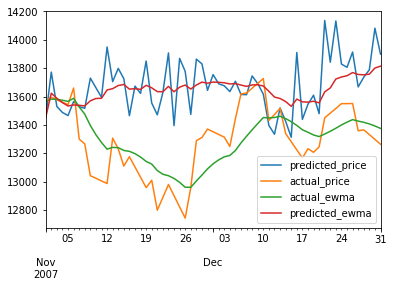

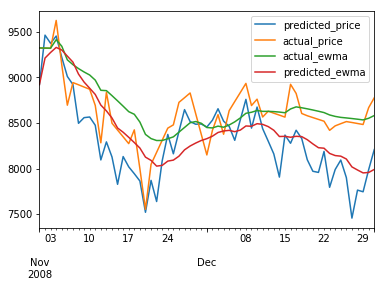

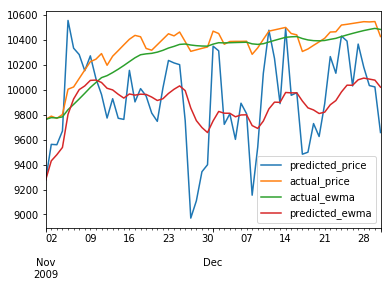

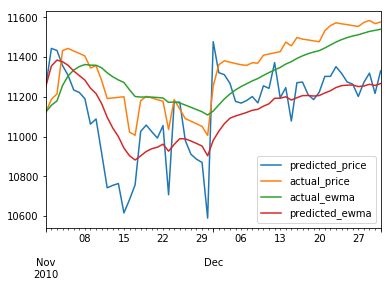

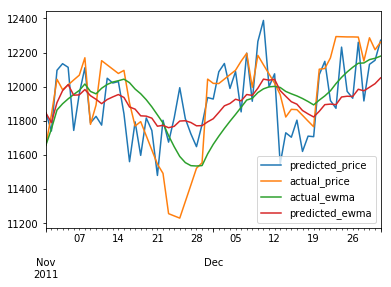

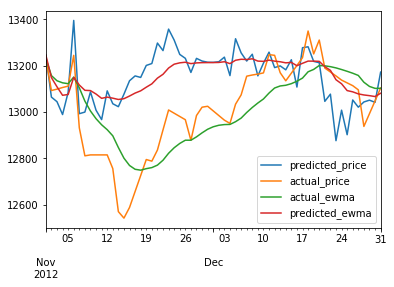

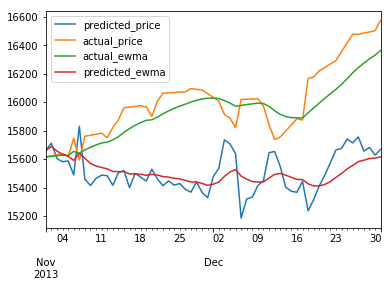

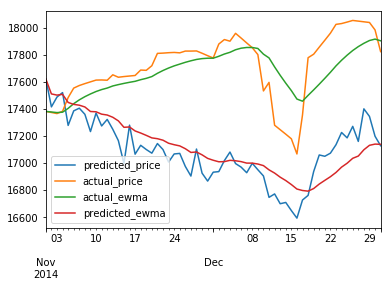

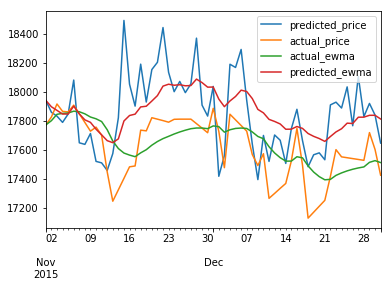

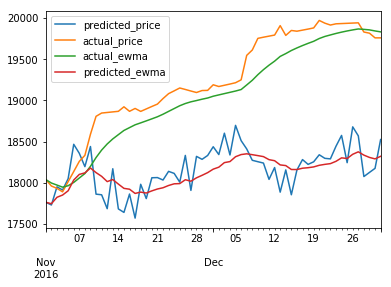

In [71]:
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-14'
    end_train = str(year) + '-10-31'
    start_test = str(year) + '-11-01'
    end_test = str(year) + '-12-31'
    train = df_main.ix[start_train:end_train]
    test = df_main.ix[start_test:end_test]
    
    sent_score = []
    for date in train.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_train = np.asarray(sent_score)
    
    sent_score = []    
    for date in test.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
        
    n_test = np.asarray(sent_score)    
    
    lin_reg = LinearRegression()
    lin_reg.fit(n_train,train['price'])

    pred = lin_reg.predict(n_test)
        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=pred[0:],index=idx,columns=['price'])
    
    pred_data['price'] = pred_data['price'] + smooth(start_test,test,pred_data)
    pred_data['actual_value'] = test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=14,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=14,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    pred_data.plot()
    

In [72]:
l = [int(x) for x in pred_data['predicted_price']]

In [73]:
l[0:4]

[17761, 17728, 17948, 17910]

In [74]:
metrics.accuracy_score(test['price'],l)

0.0

# Checking for RMSE error

In [75]:
error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

1201.925949744258


## Defining a margin

In [76]:
def allow_margin(test,pred_data):
    c = 0
    for i in range(0,len(test['price'])):
        if test['price'][i] - pred_data['predicted_price'][i] <= 1000:
            c = c + 1

    print('{0} predictions were approximately correct'.format(c))

In [77]:
allow_margin(test,pred_data)

27 predictions were approximately correct


# Trying to improve the model by scaling the feature attributes

In [57]:
I thought normalizing the features would help the model to improve as would converge faster to the local minima of
cost function bcoz the price attribute and postive,negative,neutral attributes have difference in range of values..

But i learned since the price attribute majorly influences the stock price change, due to scaling the effect of
it on the predicted values was less. So, scaling is not preferable here.

# Checking for MultiCollinearity

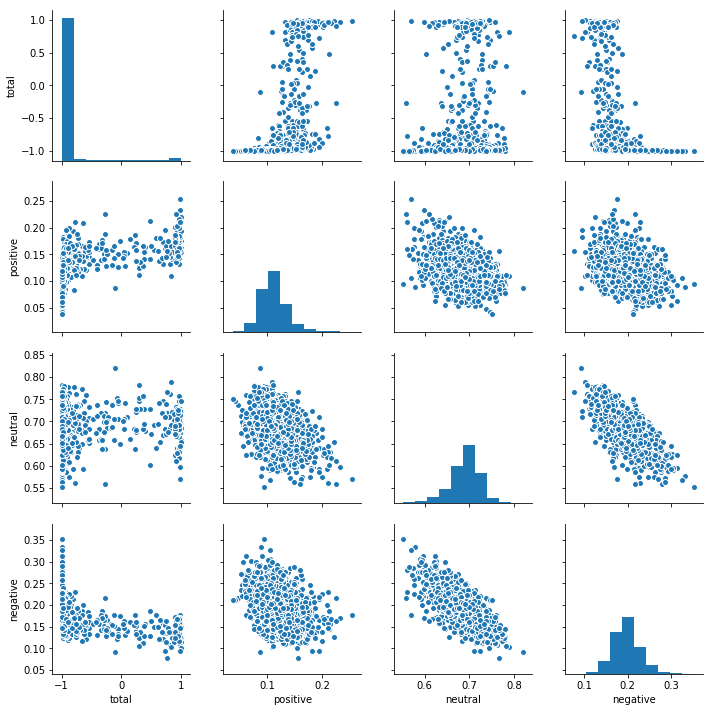

In [57]:
df_analysis = df_main[['total','positive','neutral','negative']]
sns.pairplot(df_analysis)

In [59]:
# We can see that some of the independant attributes itself have a relation between them. So keeping all of them is
# not necessary. But for learning process i have kept it..

# Implementing Ridge Regression

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


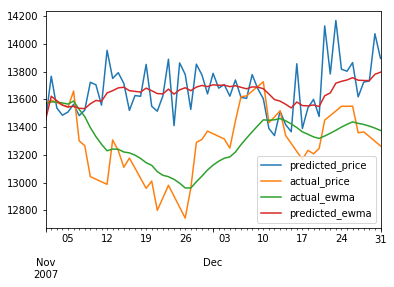

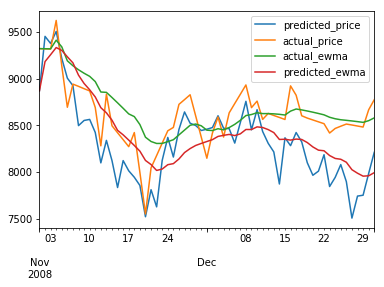

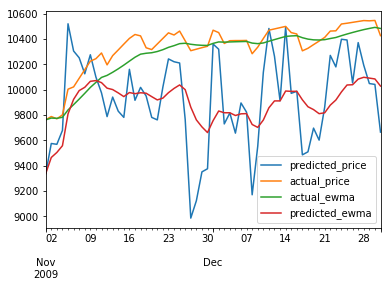

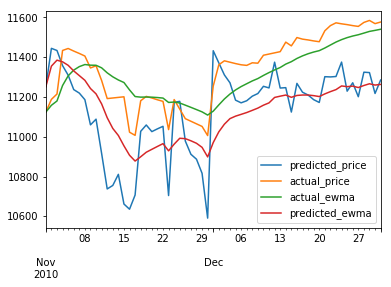

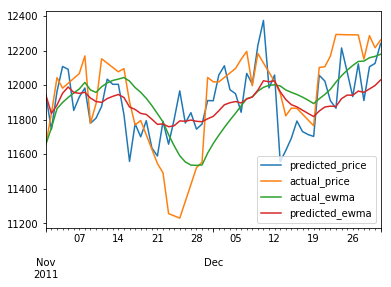

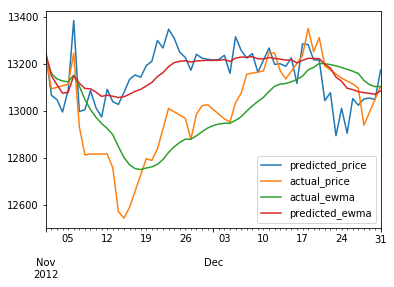

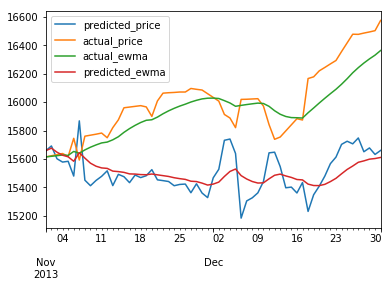

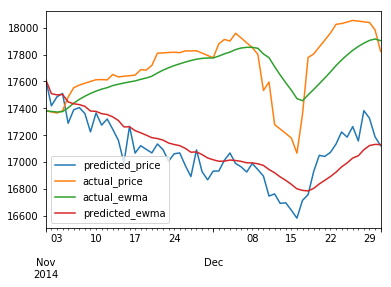

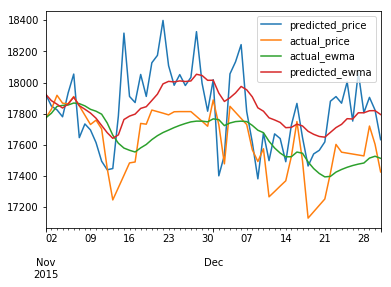

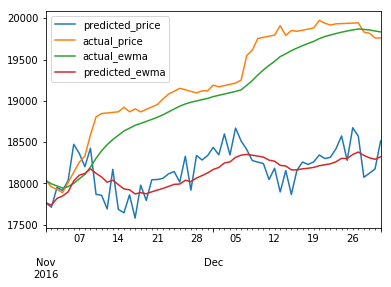

In [82]:
# Bring it on regularization!!
from sklearn.linear_model import Ridge

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-14'
    end_train = str(year) + '-10-31'
    start_test = str(year) + '-11-01'
    end_test = str(year) + '-12-31'
    train = df_main.ix[start_train:end_train]
    test = df_main.ix[start_test:end_test]
    
    sent_score = []
    for date in train.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_train = np.asarray(sent_score)
    
    sent_score = []    
    for date in test.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_test = np.asarray(sent_score)  
    
    ridge = Ridge(fit_intercept=True, alpha=0.01)

    ridge.fit(n_train,train['price'])

    pred = ridge.predict(n_test)

    prediction.append(pred)
                    
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=pred[0:],index=idx,columns=['price'])
    
    pred_data['price'] = pred_data['price'] + smooth(start_test,test,pred_data)
    
    pred_data['actual_value'] = test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=14,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=14,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    pred_data.plot()
    

In [83]:
# RMSE Error
error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

1197.8437515180012


In [80]:
# RMSE Improves !! as expected :)

In [84]:
# Check the performance with different values of alpha
print('Ridge Regression')
print('lambda\t RMSE\t')
alpha = np.linspace(0.3,0.01,20)

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)   # alpha = Regularization strength 
    
    # computing the RMSE on training data
    ridge.fit(n_train,train['price'])
    p = ridge.predict(n_test)
    pred_data = pd.DataFrame(data=p[0:],index=idx,columns=['price'])  
    p = p + smooth(start_test,test,pred_data)
    error = abs(p - test['price'])
    total_error = np.dot(error,error)
    rmse = np.sqrt(total_error/len(p))
    print('{:.3f}\t {:.4f}\t'.format(a,rmse))

Ridge Regression
lambda	 RMSE	
0.300	 1225.2310	
0.285	 1224.4921	
0.269	 1223.7139	
0.254	 1222.8930	
0.239	 1222.0253	
0.224	 1221.1067	
0.208	 1220.1321	
0.193	 1219.0959	
0.178	 1217.9916	
0.163	 1216.8118	
0.147	 1215.5477	
0.132	 1214.1892	
0.117	 1212.7244	
0.102	 1211.1391	
0.086	 1209.4163	
0.071	 1207.5357	
0.056	 1205.4722	
0.041	 1203.1953	
0.025	 1200.6671	
0.010	 1197.8438	


In [85]:
# Tuning the correct value of alpha is difficult

### Using Stochastic Gradient Descent

In [ ]:
The implementation of linear regression using batch gradient descent as default optimization technique for updating the
weights but i am trying it out with stochastic gradient descent(SGD), an advance version of that.

In case of batch(Vanilla) gradient descent, while optimizing the weights, we sum up along the whole dataset for each 
theta(weight), where as in SGD, we are using the cost gradient of 1 example at each iteration, instead of using the 
sum of the cost gradient of ALL examples. 

It is calculated after shuffling the training set. It reduces the training
time and sometimes gives optimal minima instead of local due to its randomness. (done till we get minimum cost..)
Can be very inefficient if gets stuck if local minima due to the randomness.

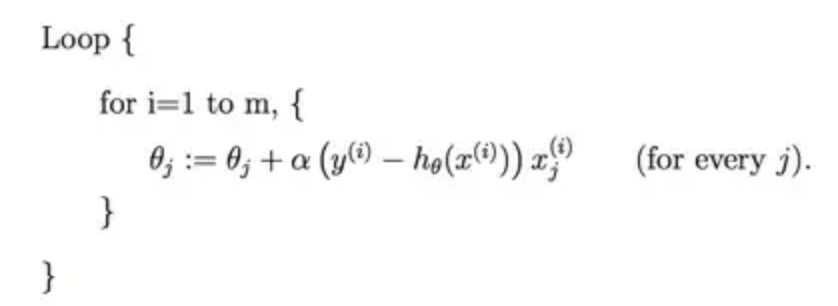

In [65]:
# Gradient Descent
Image(filename='img/gd.png',width="400")

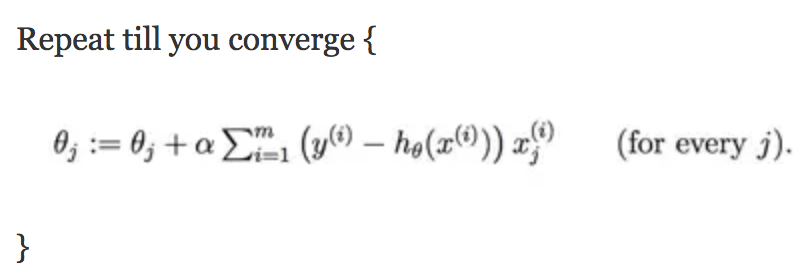

In [66]:
# Stochastic Gradient Descent
Image(filename='img/sgd.png',width="400")

In [74]:
from sklearn.linear_model import SGDRegressor
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-14'
    end_train = str(year) + '-10-31'
    start_test = str(year) + '-11-01'
    end_test = str(year) + '-12-31'
    train = df_main.ix[start_train:end_train]
    test = df_main.ix[start_test:end_test]
    
    sent_score = []
    for date in train.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_train = np.asarray(sent_score)
    
    sent_score = []    
    for date in test.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_test = np.asarray(sent_score)  
    
    reg = SGDRegressor(loss='squared_loss',penalty='l2',alpha=0.0001,learning_rate='constant',eta0=0.01,n_iter=1000)
    reg.fit(n_train,train['price'])
    
    pred = reg.predict(n_test)
    prediction.append(pred)
        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=pred[0:],index=idx,columns=['price'])
    pred_data['price'] = pred_data['price'] + smooth(start_test,test,pred_data)
    
    pred_data

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

In [75]:
# Check RMSE
error = abs(pred_data['price'] - test['price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['price']))
print(rmse_error)

33735369406073.934


In [69]:
# The answer is random and very large, i.e. we get stuck in local minima while finding the cost.. (not preferable)

# Decision Tree Regression

In [74]:
# So before attempting this i think this would lead to a better accuracy as compared to other models as it captures 
# the intuition of the prices of stock when the sentiment values are near each other(i.e. postive,negative,neutral)
# bcoz in this type of classification, the values are predicted after the training data is segregated based on the 
# value of their attribute values.

# It should capture the intuition well of the increase or decrease of prices as compared to other models
# The accuracy can be low as the implementation give mean value of the box(made by training) where the testing data 
# belongs to while testing

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


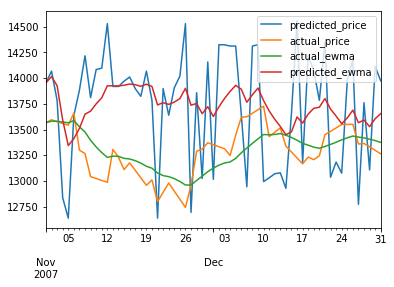

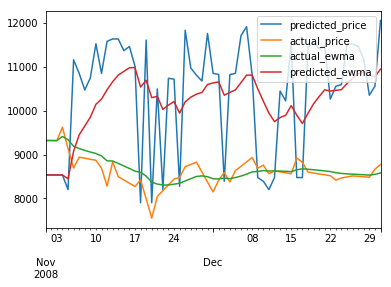

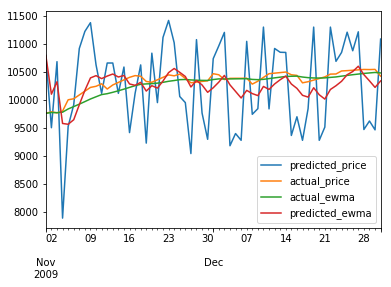

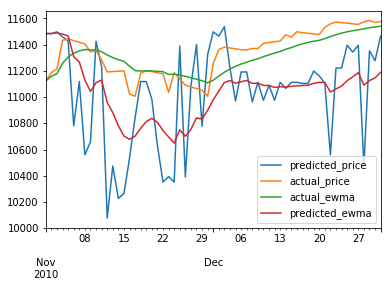

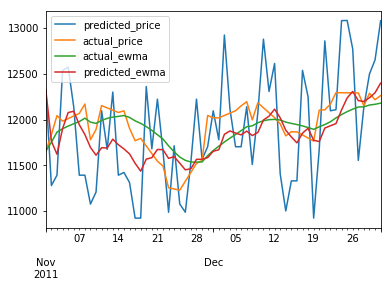

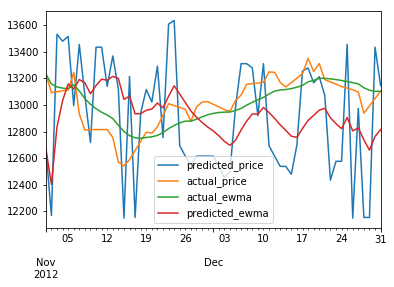

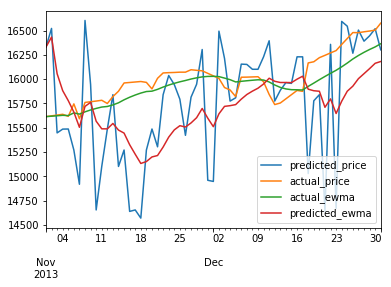

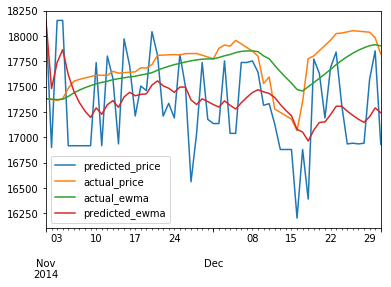

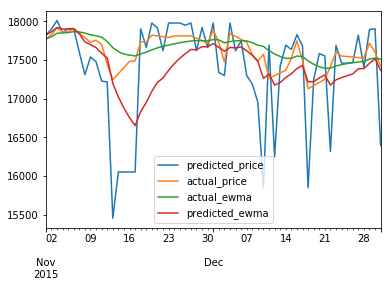

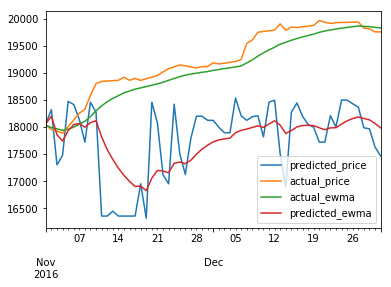

In [67]:
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-14'
    end_train = str(year) + '-10-31'
    start_test = str(year) + '-11-01'
    end_test = str(year) + '-12-31'
    train = df_main.ix[start_train:end_train]
    test = df_main.ix[start_test:end_test]
    
    sent_score = []
    for date in train.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_train = np.asarray(sent_score)
    
    sent_score = []    
    for date in test.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_test = np.asarray(sent_score)    
    
    dtr = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None)
    dtr.fit(n_train,train['price'])
    
    pred = dtr.predict(n_test)
    prediction.append(pred)
        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=pred[0:],index=idx,columns=['price'])
    
    pred_data['price'] = pred_data['price'] + smooth(start_test,test,pred_data)
    
    pred_data['actual_value'] = test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=14,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=14,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    pred_data.plot()

In [32]:
# Check the RMSE error
error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

1594.634830577394


In [79]:
# We can see it captures the intuition well but does not have good accuracy as compared to previous models.   

# Using Bagging

In [79]:
from sklearn.ensemble import BaggingRegressor
max_n_ests = 100
l = []
for j in [500,1000,5000,99999]:
    dtr = DecisionTreeRegressor(max_features=None,max_leaf_nodes=j)
    #print(j)
    for i in np.arange(1,max_n_ests):
        baglfy=BaggingRegressor(base_estimator=dtr , n_estimators=i,
            max_samples=1.0)
        baglfy=baglfy.fit(n_train,train['price'])
        p = baglfy.predict(n_test)
        error = abs(p - test['price'])
        total_error = np.dot(error,error)
        # Compute RMSE
        rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
        print(rmse_error)
        l.append(rmse_error)

1692.1232176193782
1725.0142729274094
1588.4367858327007
1673.8187387175371
1651.974269239539
1649.351655338859
1558.3997342411337
1570.424810945757
1642.6396059160706
1661.1138254146242
1578.6554554899183
1636.8613708988871
1618.090181265413
1605.5716110813844
1660.0976822928517
1642.4793330715338
1591.4411796027707
1654.1466923926214
1593.6763482822785
1611.8844566653481
1632.131565893148
1568.5097786070587
1616.319092193976
1619.1080589782916
1587.0971466046603
1627.4329057646414
1617.6917299667773
1648.5311666900664
1612.4192858898948
1624.4188202518285
1625.6962485628712
1598.0507268921142
1598.7266170606188
1601.8833026096295
1637.4819333131786
1657.7116290681392
1620.128615828173
1631.0886059469685
1589.838995652418
1662.0384519832571
1622.7671370887813
1627.5022560632437
1628.038757418686
1645.0073026074044
1594.2040014284278
1621.583380867797
1622.2040012170291
1626.5622746317047
1616.5115559070155
1613.3900728874598
1614.4894748398594
1605.6170323832405
1600.9499869523881
161

In [80]:
# Lowest RMSE error
print(min(l))

1558.3997342411337


# Using Boosting

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators=500)

reg.fit(n_train,train['price'])
p = reg.predict(n_test)
error = abs(p - test['price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

1488.173733166533


# Random Forest Regression

In [82]:
# This works the same as decision tree, the only thing different in this implemenation is that it involves many 
# decision tree implementation (which means it explores many different types of segregation of data) and gives 
# the average of the values obtained by each tree when training on the data.

# It should perform better than Decision Tree implementation.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/ana

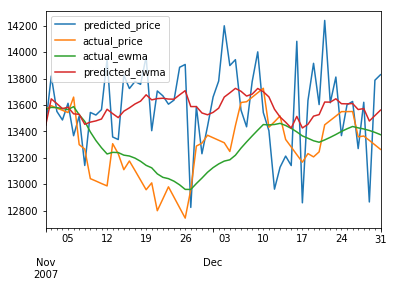

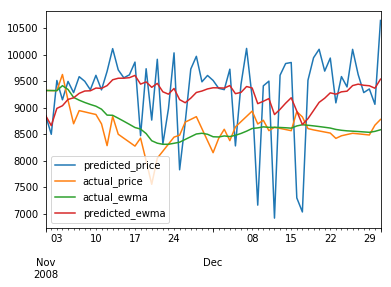

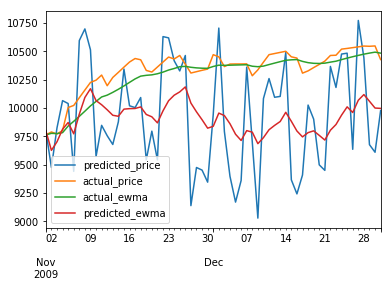

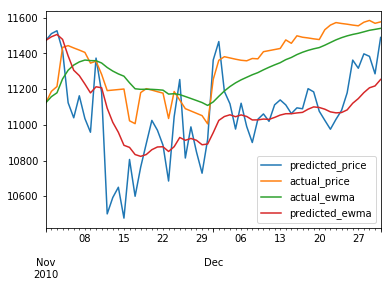

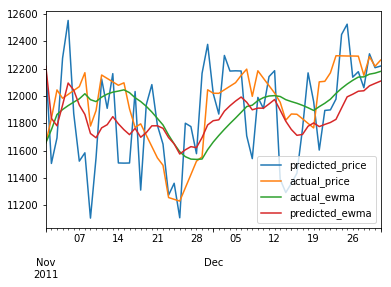

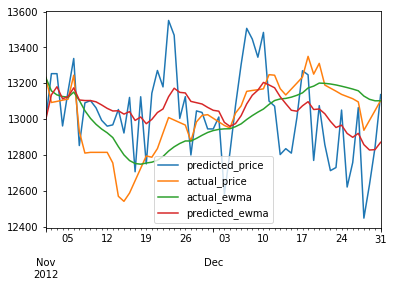

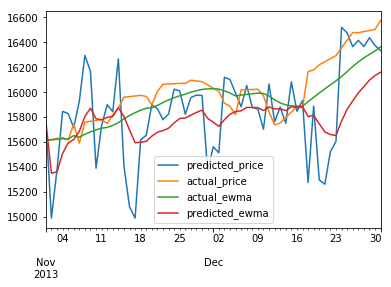

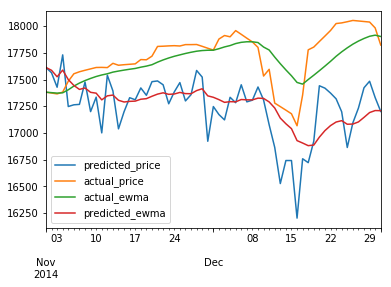

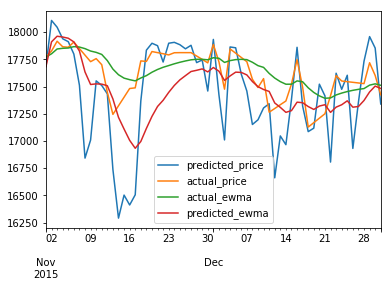

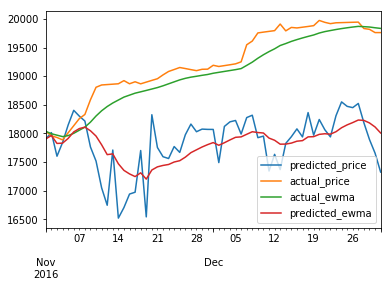

In [86]:
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-14'
    end_train = str(year) + '-10-31'
    start_test = str(year) + '-11-01'
    end_test = str(year) + '-12-31'
    train = df_main.ix[start_train:end_train]
    test = df_main.ix[start_test:end_test]
    
    sent_score = []
    for date in train.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_train = np.asarray(sent_score)
    
    sent_score = []    
    for date in test.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_test = np.asarray(sent_score)    
    
    rft = RandomForestRegressor()
    rft.fit(n_train,train['price'])
    
    pred = rft.predict(n_test)
    prediction.append(pred)
        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=pred[0:],index=idx,columns=['price'])
    
    pred_data['price'] = pred_data['price'] + smooth(start_test,test,pred_data)
    
    pred_data['actual_value'] = test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=14,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=14,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    pred_data.plot()
    

In [87]:
# Check the RMSE error
error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

1548.0024583066338


In [85]:
# It performs pretty better than expected and captures the intution of rise and fall very well. Probably the best model
# till now

# Let's Work on making it better !!

In [89]:
# So here i am going to work on different parameters on the best model we have till now, i.e. Random Forest Tree
# using GridSearchCV
# Lets Gooo!!

# n_estimators = Number of trees in random forest

# max_features = Number of features to consider at every split

# max_depth = Maximum number of levels in tree

# min_samples_split = Minimum number of samples required to split a node

# min_samples_leaf = Minimum number of samples required at each leaf node

# bootstrap = Method of selecting samples for training each tree

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

# Using the GridSearchCV on the last year data as the trend depends on the latest year..
grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid.fit(n_train, train['price'])

# We try out 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_d

[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_sam

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.6s


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, 

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, 

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, m

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, mi

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, m

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, mi

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_sa

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2,

[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_featur

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_

[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_f

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max

[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_fe

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_fe

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_

[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_f

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max

[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.3s
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_f

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_fe

[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_feat

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_fea

[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [90]:
best_grid = grid.best_estimator_
print(best_grid)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [35]:
# Testing it out..

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-14'
    end_train = str(year) + '-10-31'
    start_test = str(year) + '-11-01'
    end_test = str(year) + '-12-31'
    train = df_main.ix[start_train:end_train]
    test = df_main.ix[start_test:end_test]
    
    sent_score = []
    for date in train.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_train = np.asarray(sent_score)
    
    sent_score = []    
    for date in test.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_test = np.asarray(sent_score)    
    
    rft = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
    
    rft.fit(n_train,train['price'])
    
    pred = rft.predict(n_test)
    prediction.append(pred)
        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=pred[0:],index=idx,columns=['price'])
    
    pred_data['price'] = pred_data['price'] + smooth(start_test,test,pred_data)
    
    pred_data['actual_value'] = test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=14,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=14,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/ana

In [36]:
# Check the RMSE error
error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

1370.4971495756224


In [94]:
# The rmse error decreases..

# Boosting Vs Bagging Vs Random Forest Regression 

In [ ]:
# Tough Fight..

From my inferences and learning what they actually do, i inferred that even though both use decision tree as the base
for learning, they work in the opposite way. 

Boosting works on reducing bias and has shallow trees whereas Random Forest works on reducing variance and has deep
trees

In Bagging, the idea is to create several subsets of data from training sample chosen randomly with replacement. 
Now, each collection of subset data is used to train their decision trees. (Works on reducing variance)

Random Forest is an extension of bagging. Along with what bagging does, it also selects the random features rather 
than using all features to grow trees.

# Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
param_grid = {
            "C": [1000,3000,10000],
            "epsilon": [0.00001, 0.00003, 0.00001]
}

svr = SVR(kernel='linear')
grid_search = GridSearchCV(svr,param_grid,cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(n_train,train['price'])
print(grid_search.best_params_)

{'C': 3000, 'epsilon': 1e-05}


In [91]:

from sklearn.svm import SVR
svr2 = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr3 = SVR(kernel='poly', C=1e3, degree=2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


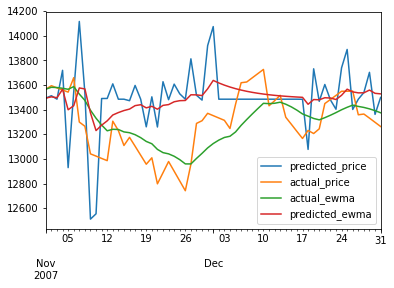

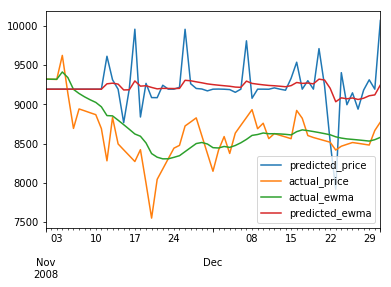

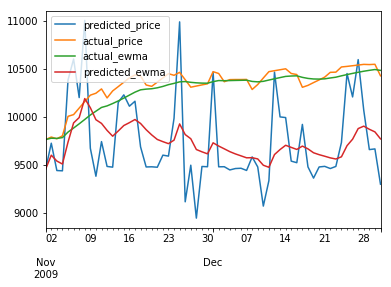

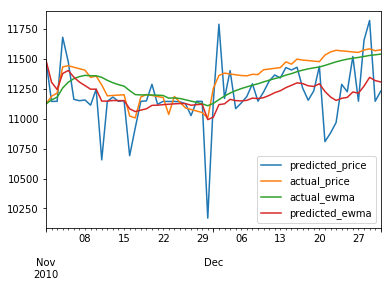

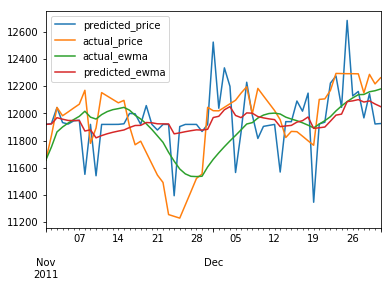

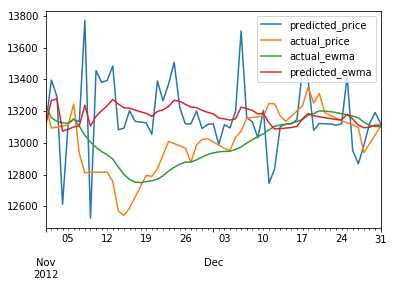

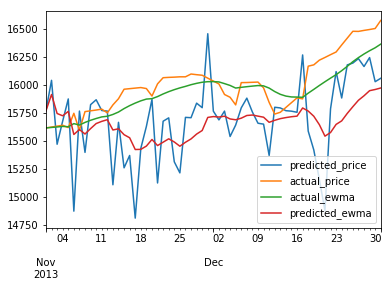

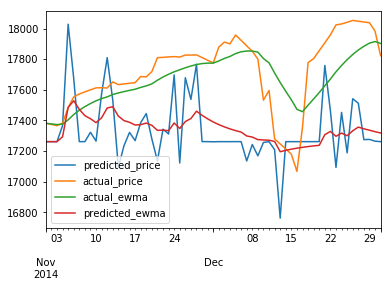

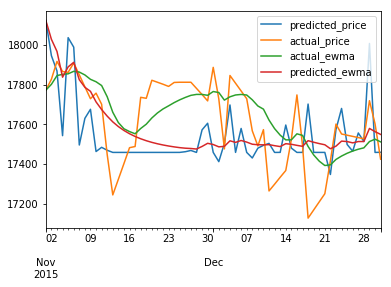

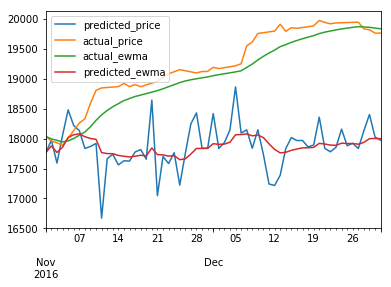

In [38]:
# Testing it out..
from sklearn.svm import SVR

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-14'
    end_train = str(year) + '-10-31'
    start_test = str(year) + '-11-01'
    end_test = str(year) + '-12-31'
    train = df_main.ix[start_train:end_train]
    test = df_main.ix[start_test:end_test]
    
    sent_score = []
    for date in train.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_train = np.asarray(sent_score)
    
    sent_score = []    
    for date in test.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_test = np.asarray(sent_score)    
    
    svr1 = SVR( C = 3000, epsilon = 1e-05)
 
    svr1.fit(n_train,train['price'])
#   svr2.fit(n_train,train['price'])
#    svr3.fit(n_train,train['price'])    
    
    pred = svr1.predict(n_test)
    #pred2 = svr2.predict(n_test)
    #pred3 = svr3.predict(n_test)    
    prediction.append(pred)
        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=pred[0:],index=idx,columns=['price'])
    
    pred_data['price'] = pred_data['price'] + smooth(start_test,test,pred_data)
    
    pred_data['actual_value'] = test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=14,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=14,freq='D')
    
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    # Changing column names
    #pred_data['predicted_price_poly'] = pred2[0:]
    #pred_data['predicted_price_rbf'] = pred3[0:]
    
    pred_data.plot()

In [39]:
# Check the RMSE error

error1 = abs(pred_data['predicted_price'] - pred_data['actual_price'])
#error2 = abs(pred_dataa['predicted_price_poly'] - pred_data['actual_price'])
#error3 = abs(pred_data['predicted_price_rbf'] - pred_data['actual_price'])
total_error1 = np.dot(error1,error1)
#total_error2 = np.dot(error2,error2)
#total_error3 = np.dot(error3,error3)

# Compute RMSE
rmse_error1 = np.sqrt(total_error/len(pred_data['predicted_price']))
#rmse_error2 = np.sqrt(total_error/len(pred_data['predicted_price']))
#rmse_error3 = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error1)
#print(rmse_error2)
#print(rmse_error3)

1370.4971495756224


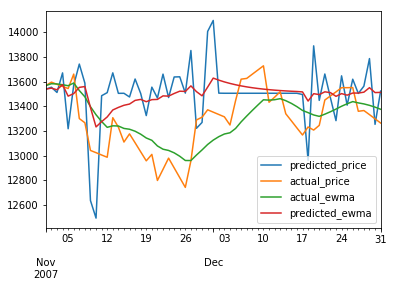

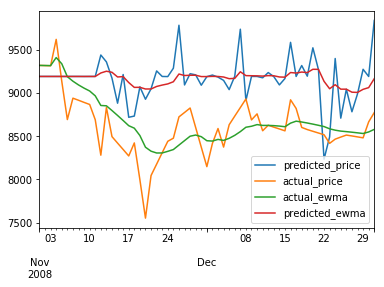

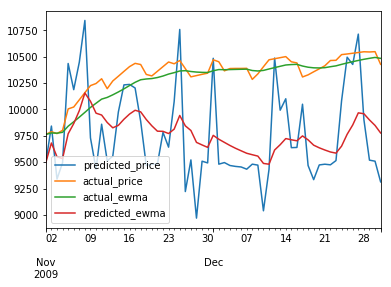

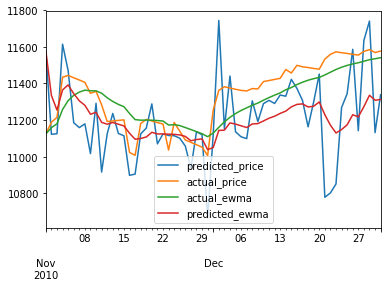

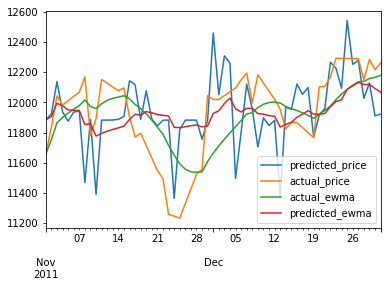

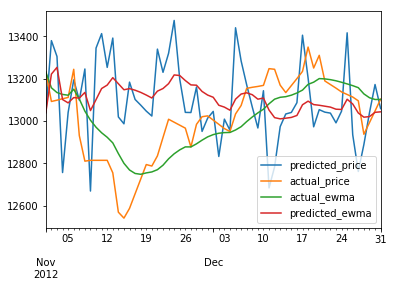

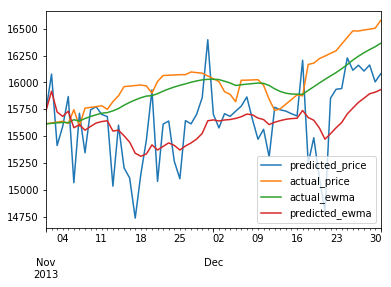

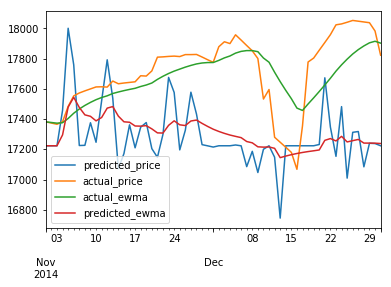

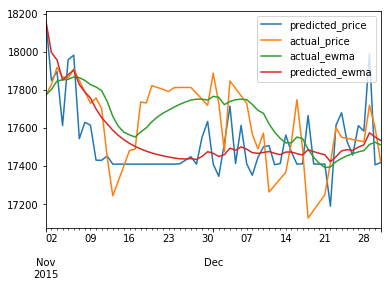

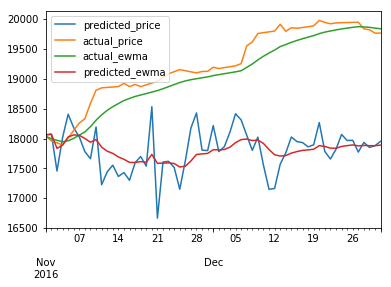

In [92]:
# Testing it out..
from sklearn.svm import SVR

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-14'
    end_train = str(year) + '-10-31'
    start_test = str(year) + '-11-01'
    end_test = str(year) + '-12-31'
    train = df_main.ix[start_train:end_train]
    test = df_main.ix[start_test:end_test]
    
    sent_score = []
    for date in train.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_train = np.asarray(sent_score)
    
    sent_score = []    
    for date in test.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_test = np.asarray(sent_score)    
    
#    svr1 = SVR( C = 3000, epsilon = 1e-05)
 
    svr2.fit(n_train,train['price'])
#   svr2.fit(n_train,train['price'])
#    svr3.fit(n_train,train['price'])    
    
    pred = svr2.predict(n_test)
    #pred2 = svr2.predict(n_test)
    #pred3 = svr3.predict(n_test)    
    prediction.append(pred)
        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=pred[0:],index=idx,columns=['price'])
    
    pred_data['price'] = pred_data['price'] + smooth(start_test,test,pred_data)
    
    pred_data['actual_value'] = test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=14,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=14,freq='D')
    
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    # Changing column names
    #pred_data['predicted_price_poly'] = pred2[0:]
    #pred_data['predicted_price_rbf'] = pred3[0:]
    
    pred_data.plot()

In [93]:
# Check the RMSE error

error1 = abs(pred_data['predicted_price'] - pred_data['actual_price'])
#error2 = abs(pred_dataa['predicted_price_poly'] - pred_data['actual_price'])
#error3 = abs(pred_data['predicted_price_rbf'] - pred_data['actual_price'])
total_error1 = np.dot(error1,error1)
#total_error2 = np.dot(error2,error2)
#total_error3 = np.dot(error3,error3)

# Compute RMSE
rmse_error1 = np.sqrt(total_error/len(pred_data['predicted_price']))
#rmse_error2 = np.sqrt(total_error/len(pred_data['predicted_price']))
#rmse_error3 = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error1)
#print(rmse_error2)
#print(rmse_error3)

1548.0024583066338


In [ ]:
# Testing it out..
from sklearn.svm import SVR

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-14'
    end_train = str(year) + '-10-31'
    start_test = str(year) + '-11-01'
    end_test = str(year) + '-12-31'
    train = df_main.ix[start_train:end_train]
    test = df_main.ix[start_test:end_test]
    
    sent_score = []
    for date in train.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_train = np.asarray(sent_score)
    
    sent_score = []    
    for date in test.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_test = np.asarray(sent_score)    
    
#    svr1 = SVR( C = 3000, epsilon = 1e-05)
 
    svr3.fit(n_train,train['price'])
#   svr2.fit(n_train,train['price'])
#    svr3.fit(n_train,train['price'])    
    
    pred = svr3.predict(n_test)
    #pred2 = svr2.predict(n_test)
    #pred3 = svr3.predict(n_test)    
    prediction.append(pred)
        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=pred[0:],index=idx,columns=['price'])
    
    pred_data['price'] = pred_data['price'] + smooth(start_test,test,pred_data)
    
    pred_data['actual_value'] = test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=14,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=14,freq='D')
    
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    # Changing column names
    #pred_data['predicted_price_poly'] = pred2[0:]
    #pred_data['predicted_price_rbf'] = pred3[0:]
    
    pred_data.plot()

# Using Neural Network

/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:113: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:114: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


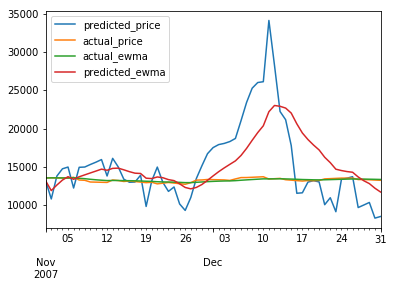

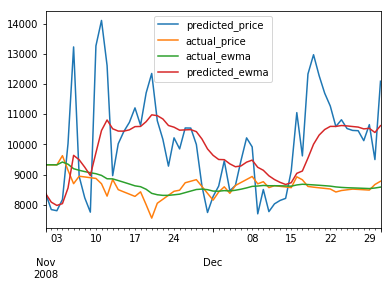

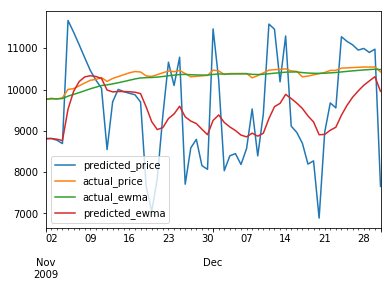

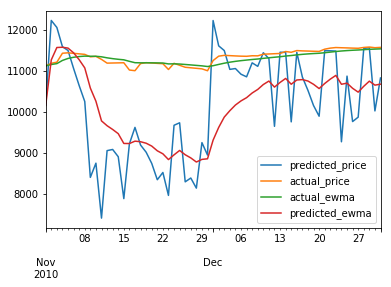

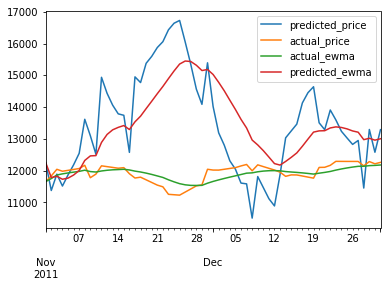

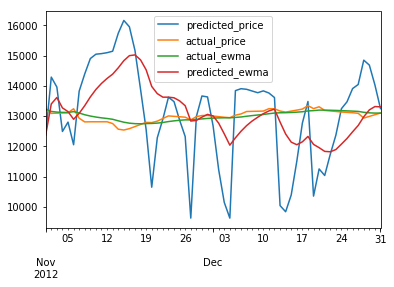

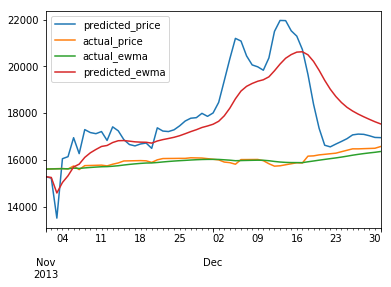

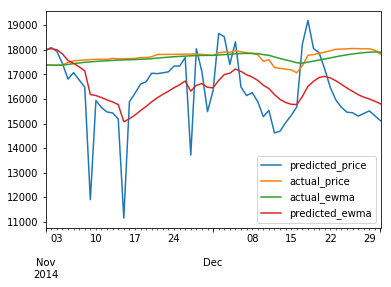

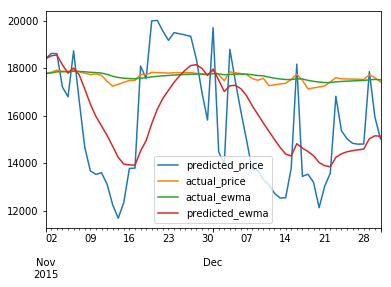

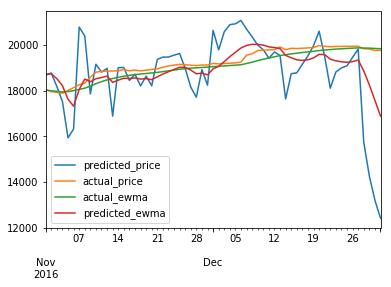

In [41]:
years = [2007 , 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

import tensorflow as tf
sess = tf.Session()
sess.run(tf.global_variables_initializer())

epochs = 200
batch_size = 20

for year in years:
    mse_train = []
    mse_test = []
    start_train = str(year) + '-01-14'
    end_train = str(year) + '-10-31'
    start_test = str(year) + '-11-01'
    end_test = str(year) + '-12-31'
    train = df_main.ix[start_train:end_train]
    test = df_main.ix[start_test:end_test]
    
    # Number of stock attributes in training data
    n_stocks = 6

    # Neurons   
    n_neurons_1 = 1024
    n_neurons_2 = 512
    n_neurons_3 = 256
    n_neurons_4 = 128

    # Session
    sess = tf.InteractiveSession()

    # Placeholder
    X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
    Y = tf.placeholder(dtype=tf.float32, shape=[None])

    # Initializers
    sigma = 0.001
    weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
    bias_initializer = tf.zeros_initializer()

    # Hidden weights
    W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
    bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
    W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
    bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
    W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
    bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
    W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
    bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

    # Output weights
    W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
    bias_out = tf.Variable(bias_initializer([1]))

    # Hidden layer
    hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
    hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
    hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
    hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

    # Output layer (transpose!)
    out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

    # Cost function
    mse = tf.reduce_mean(tf.squared_difference(out, Y))

    # Optimizer
    opt = tf.train.AdamOptimizer().minimize(mse)

    # Init
    sess.run(tf.global_variables_initializer())
    
    for i in range(epochs):
        
        sent_score = []
        for date in train.index:
            score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                                df_main.loc[date,'total'],df_main.loc[date,'positive'],
                               df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
            sent_score.append(score)
        n_train = np.asarray(sent_score)
        n_train = pd.DataFrame(n_train)
        
        for j in range(n_train.shape[0]):
            start = j*batch_size
            batch_train_x = n_train[start:start + batch_size]
            batch_train_y = train['price'][start:start + batch_size]
            sess.run(opt, feed_dict={X: batch_train_x, Y: batch_train_y})
            
    sent_score = []    
    for date in test.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        
        sent_score.append(score)
    
    n_test = np.asarray(sent_score)    
    
    pred = sess.run(out, feed_dict={X: n_test})
    #print(pred)

    
    
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=pred[0][0:],index=idx,columns=['price'])
    pred_data['price'] = pred_data['price'] + smooth(start_test,test,pred_data)
    
    
    pred_data['actual_value'] = test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=14,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=14,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    pred_data.plot()
    

In [ ]:
# Check the RMSE error
error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

In [129]:
test.shape

(61, 7)

In [ ]:
# It is not better than Random Forest Regression !!

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def load(data,seq_len):

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = pd.DataFrame(train[:, -1])
    x_test = result[int(row):, :-1]
    y_test = pd.DataFrame(result[int(row):, -1])
    x_train = scaler.fit_transform(x_train)
    y_train = scaler.fit_transform(y_train)
    x_test = scaler.fit_transform(x_test)
    y_test = scaler.fit_transform(y_test)

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  
        
    return [x_train, y_train, x_test, y_test]


In [89]:
from numpy import newaxis
def predict_sequence_full(model, data, window_size):
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted
